# なぜこのノートブックを作成したのか
近年、数理最適化と機械学習の研究がますます注目を集めており、私自身もその分野に携わる研究者の一人です。本ノートブックは、こうした分野に関心を持つライトユーザーの方々にも、気軽に数理最適化と機械学習の融合に触れていただけるようにとの思いから作成しました。

ここでは、Gurobi が提供する最適化ソルバーやサービスを活用しながら、数理最適化と機械学習の組み合わせを実際に体験できる内容を紹介しています。専門的な知識がなくても理解しやすいよう配慮しているため、興味のある方はぜひ手を動かしながら試してみてください

# 🧠 Gurobi × 機械学習による価格最適化

## 📌 概要

本プロジェクトでは、数理最適化ソルバー **Gurobi** と機械学習モデルを融合し、**ビジネスにおける価格戦略の最適化**を実現する手法を紹介します。

従来の価格設定は売上実績や経験に依存していましたが、本手法では：

> ✅ **機械学習**で需要を予測し  
> ✅ その予測を **Gurobi** に組み込み、  
> ✅ **最適な価格戦略**を数理的に導出します。

---

##  このページで学べること

- 🧰 `gurobi-machinelearning` パッケージの基本的な使い方  
- 🔌 学習済みモデル（線形回帰・決定木・ニューラルネット）の Gurobi 組み込み方法  
- 🧮 価格最適化のユースケースと数理モデルの構築  
- 🚀 Gurobi 10.0 によるパフォーマンス改善の効果  
- 📊 最適化結果の可視化と解釈  

---

## 🧩 技術的なポイント

| 項目                 | 内容                                             |
|----------------------|--------------------------------------------------|
| 使用技術             | Python / scikit-learn / Gurobi / pandas          |
| 最適化アルゴリズム   | 混合整数計画法（MIP）                           |
| 機械学習モデル       | 線形回帰  |
| Gurobi バージョン    | 10.0                                            |

---

## 🎯 このプロジェクトの意義

Gurobi と機械学習の統合により、単なる「予測」から一歩進み、  
**「最適なアクションの自動提案」**が可能になります。

💡 **こんな方におすすめ：**

- 機械学習のアウトプットをビジネスの意思決定に繋げたい方  
- 数理最適化を現場課題に応用したいエンジニア・アナリスト  
- Gurobi の実践的な使い方を学びたい方  

---

> ✨ **数理最適化 × AI ＝ 次世代の意思決定支援**  
> ビジネス価値を最大化する価格戦略のヒントがここにあります。


# 小売価格の最適化

小売価格の最適化とは、小売業者が販売する商品の価格を、利益の最大化を目指して戦略的に決定するプロセスです。目標は、顧客にとって魅力的でありながら、企業にとっても利益率を最大化できる価格ポイントを見つけることにあります。

従来の価格設定は経験や勘に頼ることが多くありましたが、近年ではデータドリブンな手法が主流となってきており、競合分析、顧客セグメンテーション、価格テストといったアプローチが重視されています。

---

## 最適化のための主なアプローチ

### 1. 競合分析

競合他社が提供する類似商品の価格を継続的にモニタリングし、それに基づいて自社の価格を調整します。競争優位性を保つためには、競合の価格帯とのバランスを取りながら、付加価値をどう伝えるかが重要です。

### 2. 顧客セグメンテーション

顧客を購買履歴や価格感度などの要素でグループに分け、それぞれの特性に応じた価格戦略を設定します。たとえば、価格に敏感な層には割引や特価、ブランド志向の顧客にはプレミアム価格を提案するなどの施策が考えられます。

### 3. 価格テスト

A/Bテストのように複数の価格帯を試し、最も利益に寄与する価格帯を実証的に見極める手法です。短期的な価格変動とその影響を計測することで、最適な価格設定の根拠が得られます。

---




<div class="alert alert-success" role="alert">
 <h3>このプロジェクトで行うこと</h3> <ul> <li>複数の商品を含む小売データの探索的データ解析（EDA）</li>
 <li>最適な価格を予測するための回帰モデル作成</li> 
 <li>回帰モデル,Gurobiを用いた小売価格最適化</li> 
 </ul> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import eli5
from eli5.sklearn import PermutationImportance
import shap

# Loading Data

In [2]:
path = "retail_price.csv"

df = pd.read_csv(path)
df.head(10)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### データの大きさ

In [4]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 30
Samples: 676


### 欠損値確認

In [5]:
any(df.isna().sum() > 0)

False

### 基本統計量

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


# データ分析

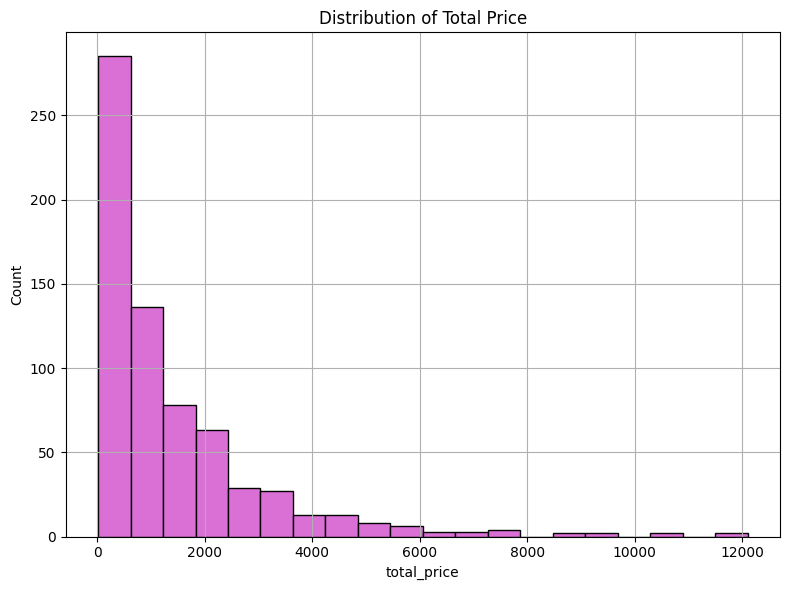

In [7]:
import matplotlib.pyplot as plt

# データ準備（例としてdfがすでにある前提）
# df = ...

plt.figure(figsize=(8, 6))
plt.hist(df['total_price'], bins=20, color='orchid', edgecolor='black')
plt.title('Distribution of Total Price')
plt.xlabel('total_price')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()


# プロット表示
plt.show()


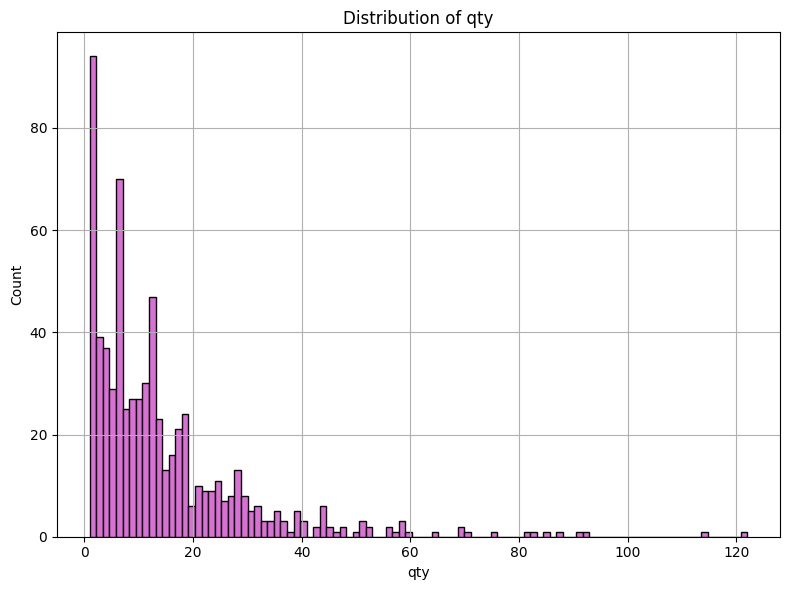

In [8]:
import matplotlib.pyplot as plt

# データ準備（例としてdfがすでにある前提）
# df = ...

plt.figure(figsize=(8, 6))
plt.hist(df['qty'], bins=100, color='orchid', edgecolor='black')
plt.title('Distribution of qty')
plt.xlabel('qty')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()

# プロット表示
plt.show()


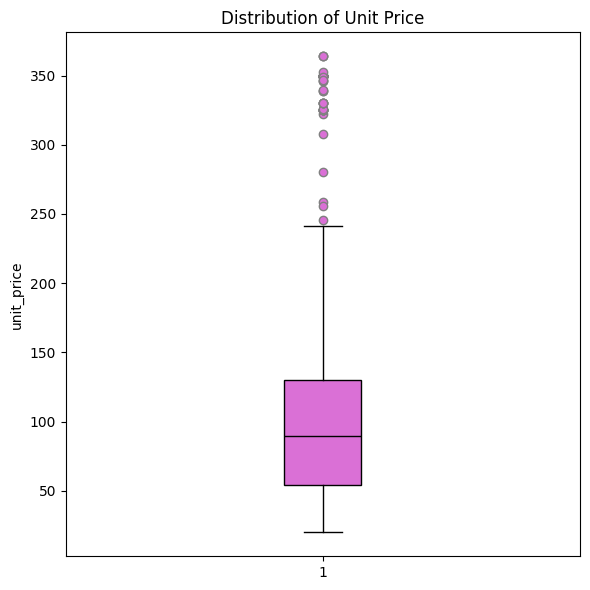

In [9]:
import matplotlib.pyplot as plt

# データ準備（dfが既にある前提）
# df = ...

plt.figure(figsize=(6, 6))
plt.boxplot(df['unit_price'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='orchid', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='orchid', markeredgecolor='gray'))

plt.title('Distribution of Unit Price')
plt.ylabel('unit_price')
plt.tight_layout()

# プロット表示
plt.show()


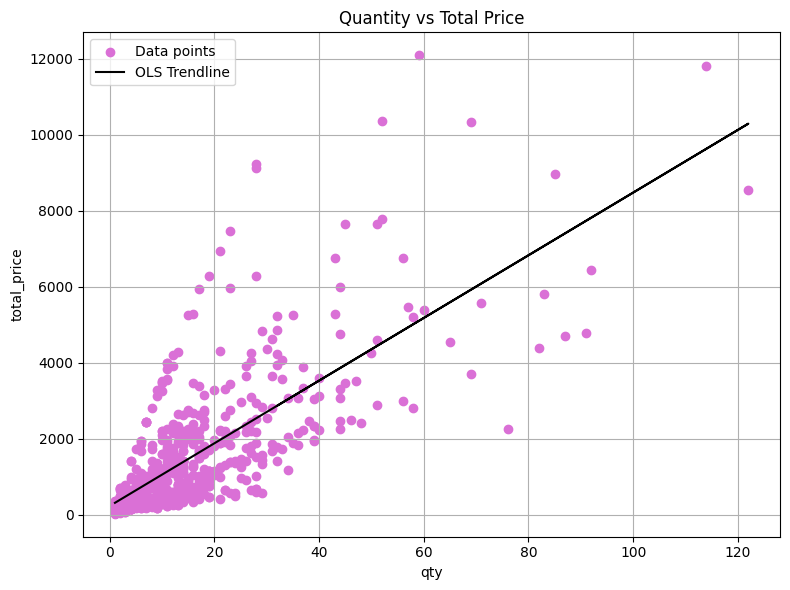

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# データ準備（df がすでにある前提）
# df = ...

# 欠損値除去（必要なら）
data = df[['qty', 'total_price']].dropna()

# 回帰分析
X = sm.add_constant(data['qty'])  # 定数項を追加
model = sm.OLS(data['total_price'], X).fit()
predictions = model.predict(X)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(data['qty'], data['total_price'], color='orchid', label='Data points')
plt.plot(data['qty'], predictions, color='black', label='OLS Trendline')
plt.title('Quantity vs Total Price')
plt.xlabel('qty')
plt.ylabel('total_price')
plt.legend()
plt.grid(True)
plt.tight_layout()


# プロット表示
plt.show()


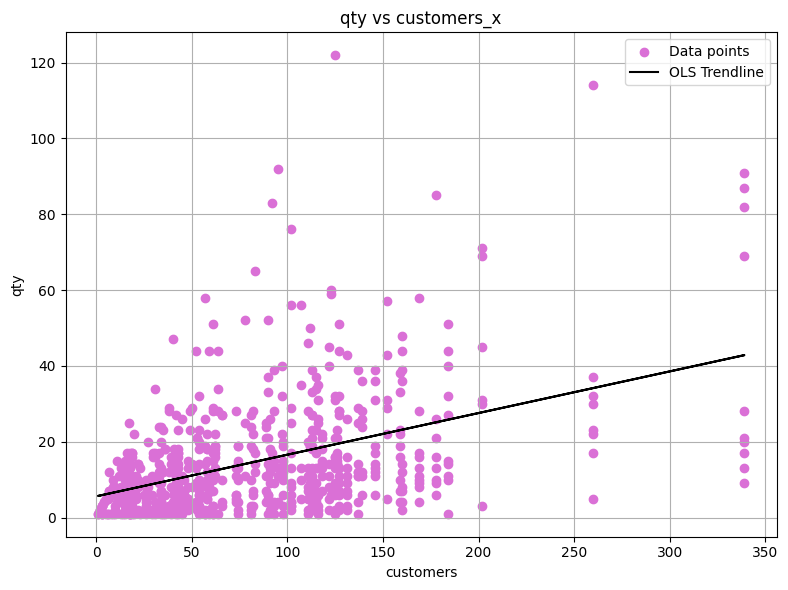

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データ前処理
data = df[['customers', 'qty']].dropna()

# 回帰モデルの作成
X = sm.add_constant(data['customers'])  # 定数項追加
model = sm.OLS(data['qty'], X).fit()
predictions = model.predict(X)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(data['customers'], data['qty'], color='orchid', label='Data points')
plt.plot(data['customers'], predictions, color='black', label='OLS Trendline')
plt.title('qty vs customers_x')
plt.xlabel('customers')
plt.ylabel('qty')
plt.legend()
plt.grid(True)
plt.tight_layout()


# プロット表示
plt.show()


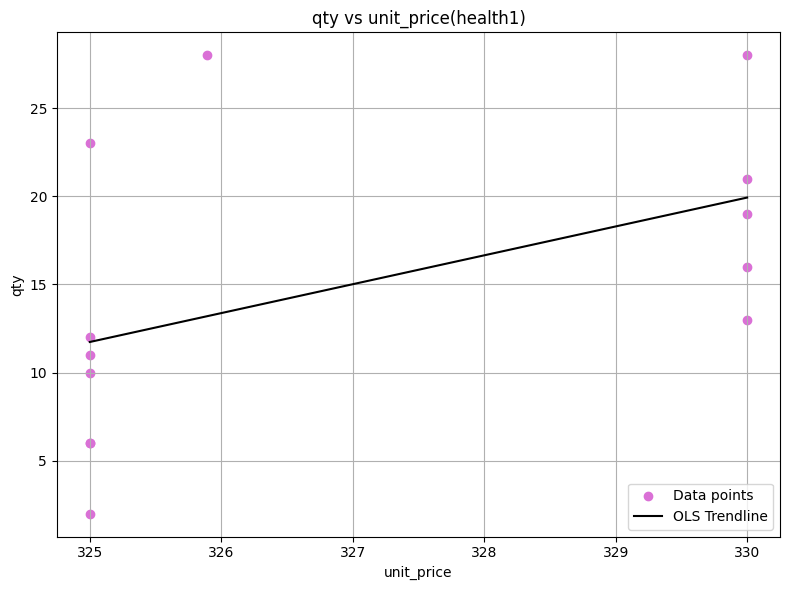

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# データ前処理
unit_price_data = df[df["product_id"] == "health2"]
data = unit_price_data[['unit_price', 'qty']].dropna()

# 回帰モデルの作成
X = sm.add_constant(data['unit_price'])  # 定数項追加
model = sm.OLS(data['qty'], X).fit()
predictions = model.predict(X)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(data['unit_price'], data['qty'], color='orchid', label='Data points')
plt.plot(data['unit_price'], predictions, color='black', label='OLS Trendline')
plt.title('qty vs unit_price(health1)')
plt.xlabel('unit_price')
plt.ylabel('qty')
plt.legend()
plt.grid(True)
plt.tight_layout()


# プロット表示
plt.show()


In [13]:
df["product_id"].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

In [14]:
df[df["product_id"] == "health1"]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
227,health1,health_beauty,01-08-2017,3,254.97,15.570000,84.99,49,1495,3,...,23.397407,4.3,14.276786,89.99,4.1,13.410556,58.99,3.9,16.240909,84.94
228,health1,health_beauty,01-09-2017,4,339.96,15.600000,84.99,49,1495,3,...,23.990000,4.3,16.120000,89.99,4.1,13.964286,58.99,3.9,15.639200,84.99
229,health1,health_beauty,01-10-2017,3,254.97,19.610000,84.99,49,1495,3,...,23.990000,4.3,13.136667,89.99,4.1,16.562917,58.99,3.9,19.065263,84.99
230,health1,health_beauty,01-11-2017,36,3059.64,17.408333,84.99,49,1495,3,...,23.990000,4.3,12.375357,89.99,4.1,16.990385,58.99,3.9,15.711667,84.99
231,health1,health_beauty,01-12-2017,50,4249.50,16.244600,84.99,49,1495,3,...,23.990000,4.3,12.456842,89.99,4.1,15.894737,58.99,3.9,16.332222,84.99
232,health1,health_beauty,01-01-2018,13,1104.87,15.996154,84.99,49,1495,3,...,23.990000,4.3,11.287368,89.99,4.1,14.811000,58.99,3.9,22.678333,84.99
233,health1,health_beauty,01-02-2018,7,594.93,15.867143,84.99,49,1495,3,...,23.990000,4.3,12.550000,89.99,4.1,16.307647,58.99,3.9,19.575000,84.99
234,health1,health_beauty,01-03-2018,4,339.96,16.375000,84.99,49,1495,3,...,23.990000,4.3,14.198750,83.74,4.1,11.876875,58.99,3.9,15.228000,84.99
235,health1,health_beauty,01-06-2018,2,169.98,22.080000,84.99,49,1495,3,...,23.990000,4.3,16.270000,79.99,4.1,13.362308,58.99,3.9,16.430000,84.94


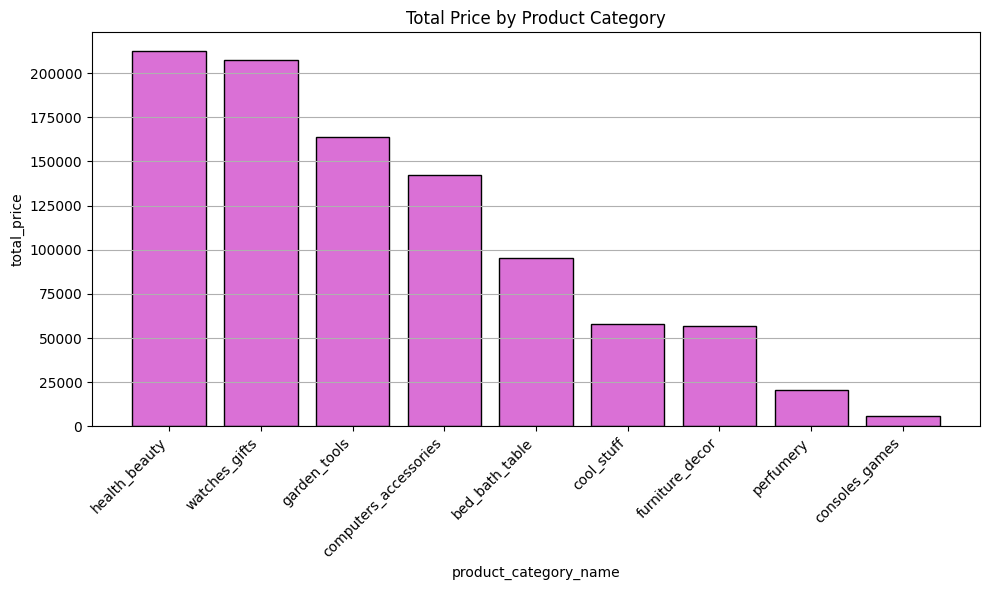

In [15]:
import matplotlib.pyplot as plt

# データをカテゴリごとに集計
category_totals = df.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False)

# プロット
plt.figure(figsize=(10, 6))
plt.bar(category_totals.index, category_totals.values, color='orchid', edgecolor='black')
plt.title('Total Price by Product Category')
plt.xlabel('product_category_name')
plt.ylabel('total_price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')

# プロット表示
plt.show()


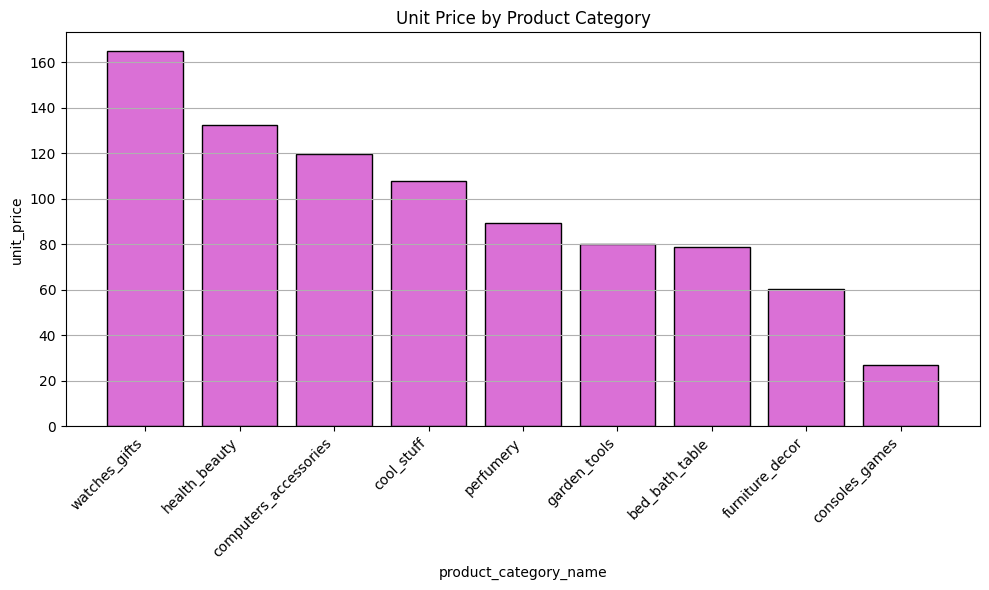

In [16]:
import matplotlib.pyplot as plt

# カテゴリごとに unit_price を平均（必要に応じて合計に変更可）
category_avg = df.groupby('product_category_name')['unit_price'].mean().sort_values(ascending=False)

# プロット
plt.figure(figsize=(10, 6))
plt.bar(category_avg.index, category_avg.values, color='orchid', edgecolor='black')
plt.title('Unit Price by Product Category')
plt.xlabel('product_category_name')
plt.ylabel('unit_price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')


plt.show()


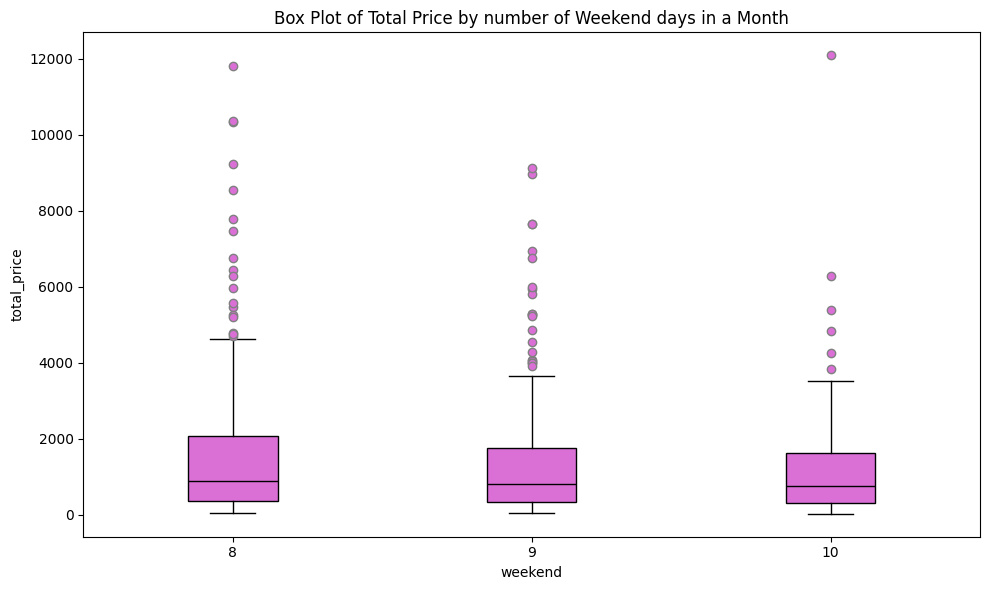

In [17]:
import matplotlib.pyplot as plt

# 必要な列の欠損値を除去
data = df[['weekend', 'total_price']].dropna()

# x軸のカテゴリ順にグループ化して値を並べる
grouped = [group['total_price'].values for _, group in data.groupby('weekend')]

# プロット
plt.figure(figsize=(10, 6))
plt.boxplot(grouped, patch_artist=True,
            boxprops=dict(facecolor='orchid', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='orchid', markeredgecolor='gray'))

# x軸ラベルの設定
plt.xticks(ticks=range(1, len(grouped) + 1), labels=sorted(data['weekend'].unique()))
plt.title('Box Plot of Total Price by number of Weekend days in a Month')
plt.xlabel('weekend')
plt.ylabel('total_price')
plt.tight_layout()

# 画像保存

# プロット表示
plt.show()


### 競合製品との比較
前述の通り、競合分析は非常に重要です。したがって、各製品の単価および送料を、3つの異なる競合他社と比較します。

そのために、各項目について自社と競合との価格差を単純に算出します。

### 価格

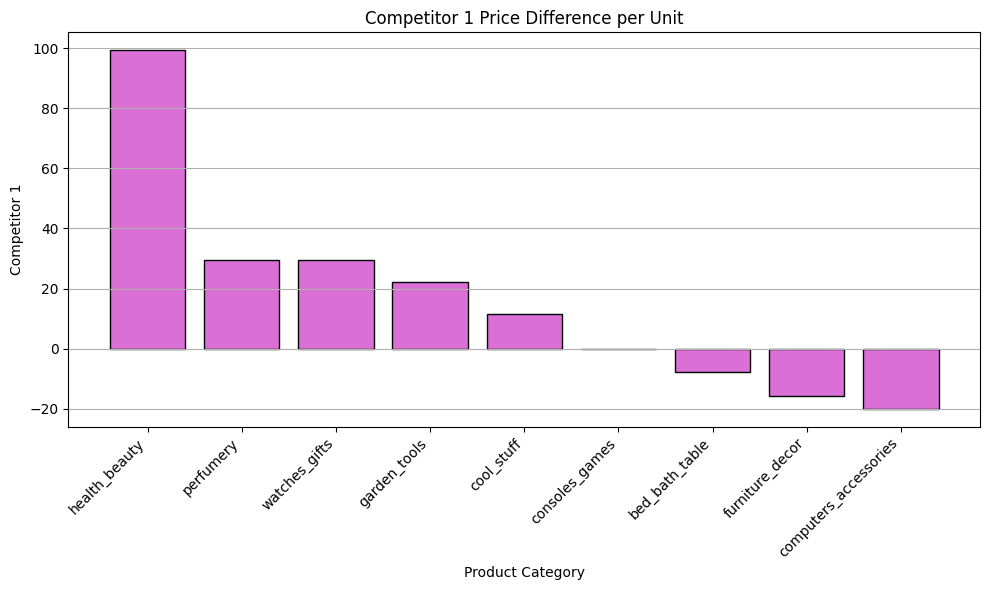

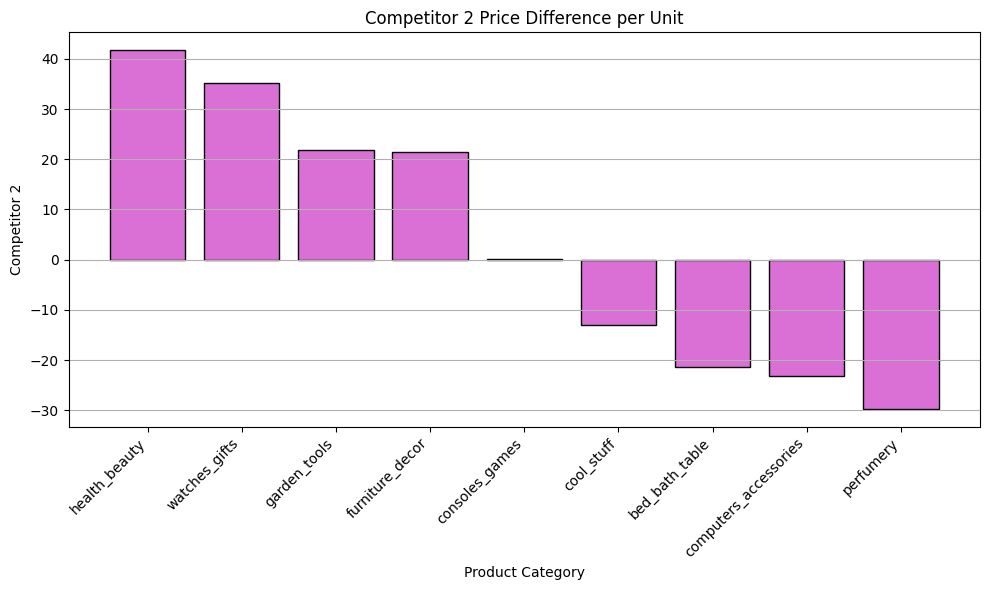

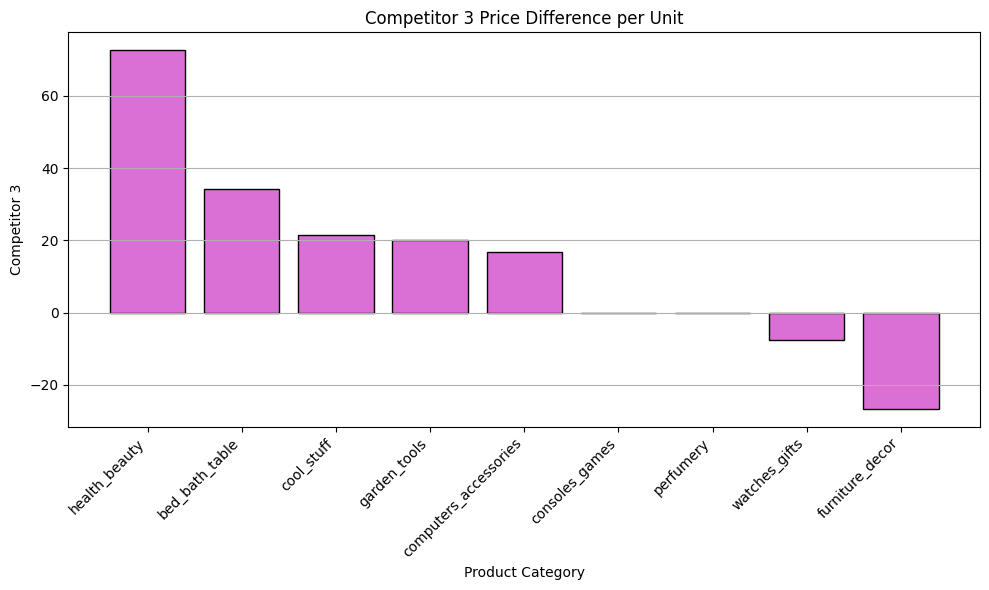

In [18]:
import matplotlib.pyplot as plt

# 差分カラムを計算（すでに実行済みならスキップ可）
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

# 競合価格差分を可視化
for i in range(1, 4):
    comp = f'comp{i}_diff'
    
    # カテゴリごとの平均差分を計算
    category_diff = df.groupby('product_category_name')[comp].mean().sort_values(ascending=False)
    
    # プロット
    plt.figure(figsize=(10, 6))
    plt.bar(category_diff.index, category_diff.values, color='orchid', edgecolor='black')
    plt.title(f'Competitor {i} Price Difference per Unit')
    plt.xlabel('Product Category')
    plt.ylabel(f'Competitor {i}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()


    # 表示
    plt.show()


### 運輸

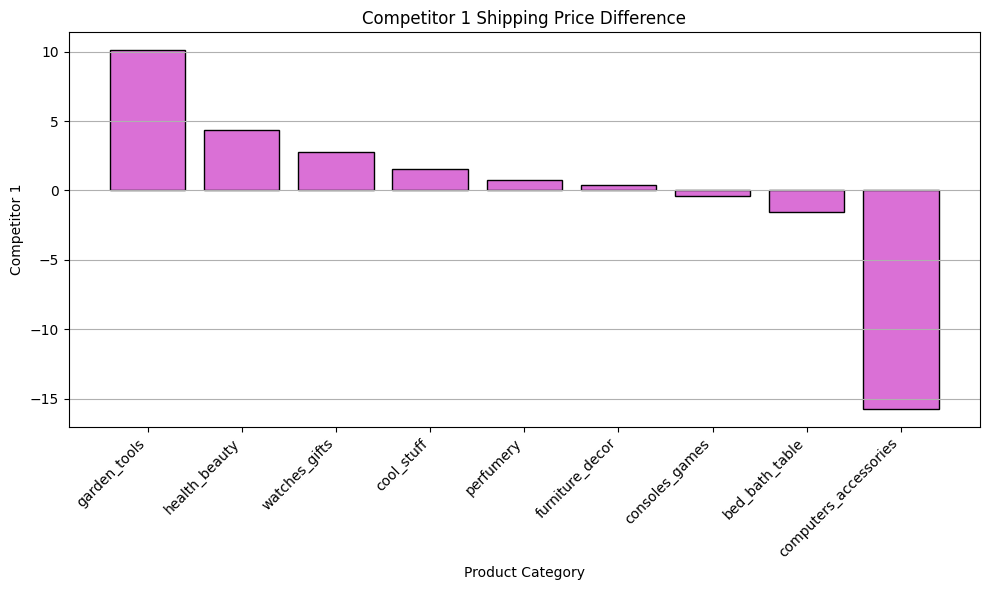

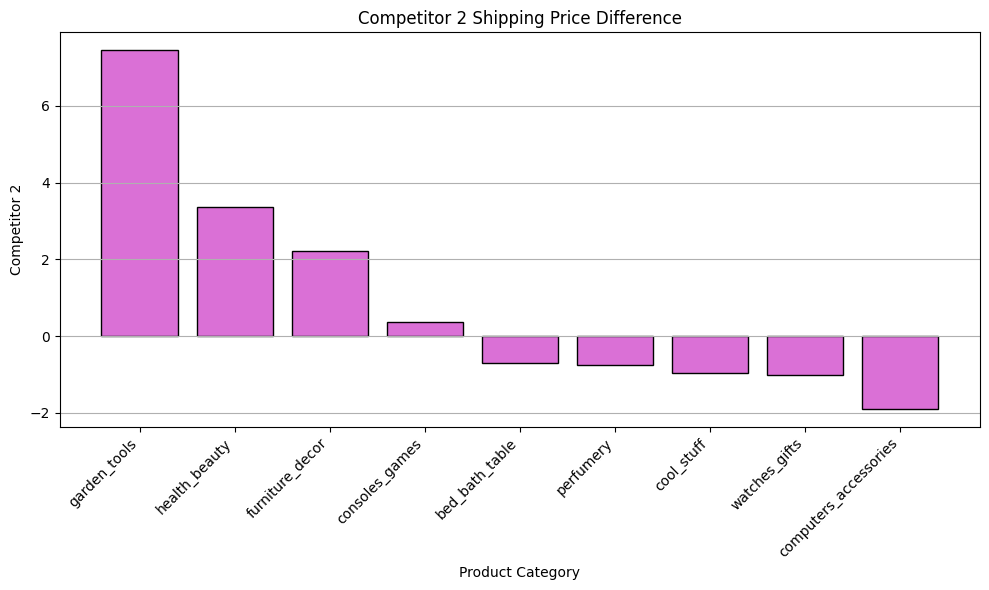

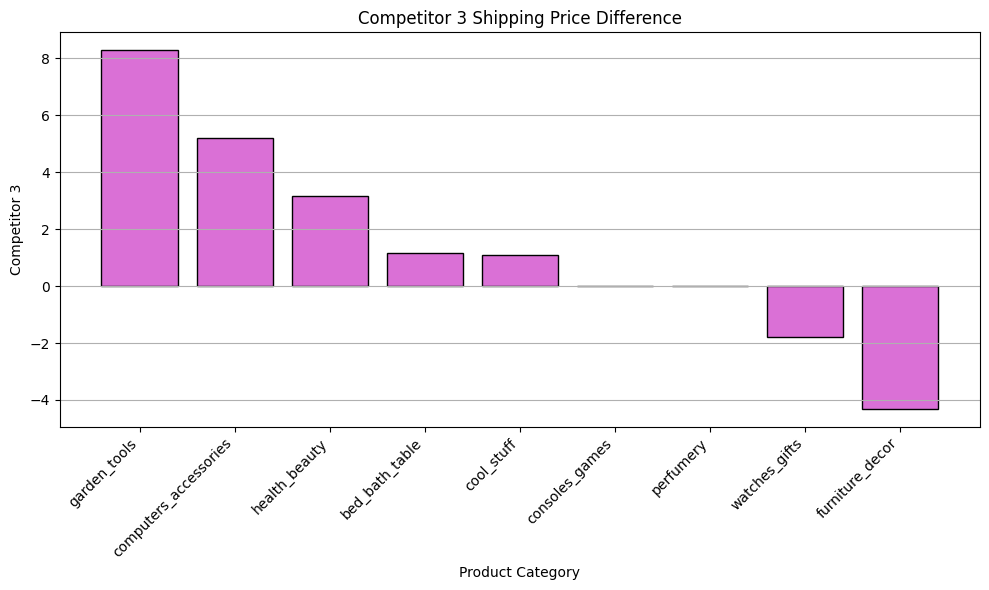

In [19]:
import matplotlib.pyplot as plt

# 差分の計算（すでに計算済みならスキップ）
df['fp1_diff'] = df['freight_price'] - df['fp1']
df['fp2_diff'] = df['freight_price'] - df['fp2']
df['fp3_diff'] = df['freight_price'] - df['fp3']

for i in range(1, 4):
    comp = f'fp{i}_diff'
    
    # カテゴリごとの平均差分を計算
    category_diff = df.groupby('product_category_name')[comp].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(category_diff.index, category_diff.values, color='orchid', edgecolor='black')
    plt.title(f'Competitor {i} Shipping Price Difference')
    plt.xlabel('Product Category')
    plt.ylabel(f'Competitor {i}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()


    plt.show()


### Month-wise Sales Analysis

This dataset includes features that are **temporal** in nature. The attributes of each product (sales, quantity, etc) are shown over a span of several months. Hence, we take a look at this data aggregated across time.

In [20]:
monthly_df = df.groupby(by=["product_id",'month_year']).agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

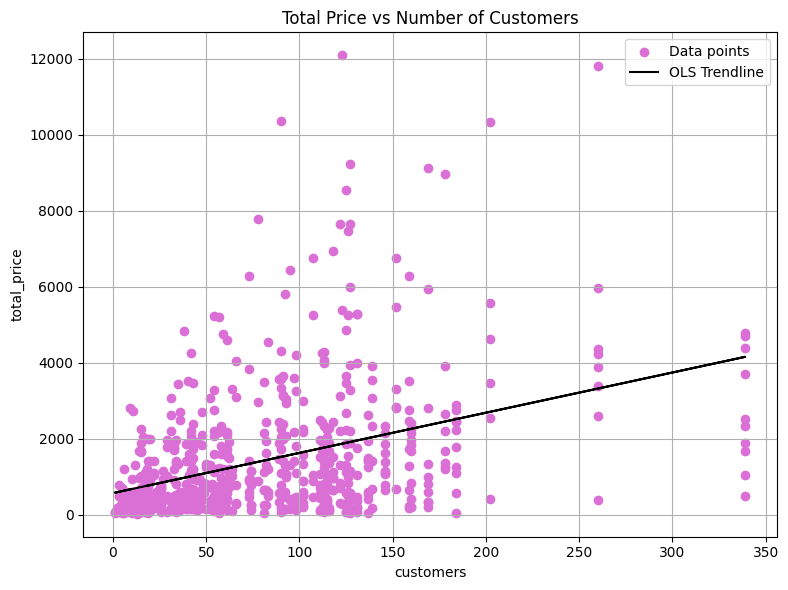

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 欠損値を除去
data = monthly_df[['customers', 'total_price']].dropna()

# 回帰モデル作成
X = sm.add_constant(data['customers'])
model = sm.OLS(data['total_price'], X).fit()
preds = model.predict(X)

# プロット
plt.figure(figsize=(8,6))
plt.scatter(data['customers'], data['total_price'], color='orchid', label='Data points')
plt.plot(data['customers'], preds, color='black', label='OLS Trendline')
plt.title('Total Price vs Number of Customers')
plt.xlabel('customers')
plt.ylabel('total_price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


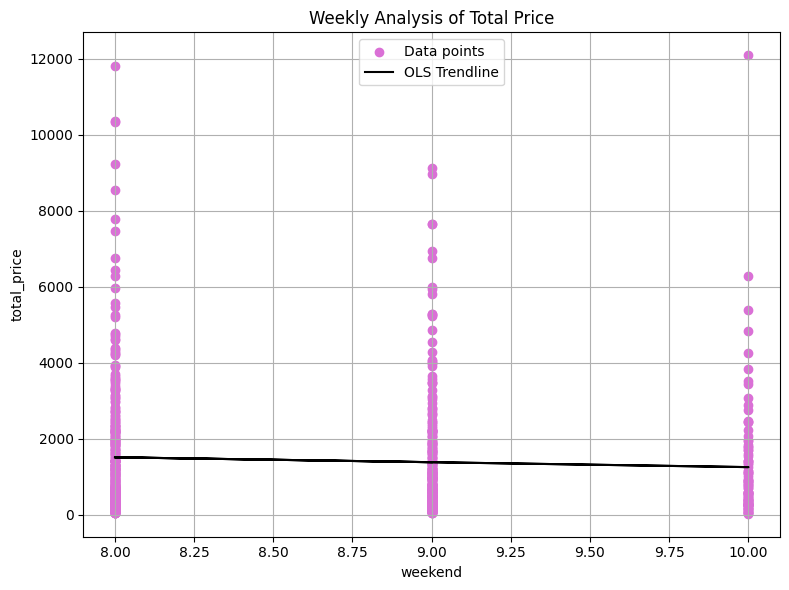

In [22]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 欠損値を除去
data = monthly_df[['weekend', 'total_price']].dropna()

# 回帰モデル作成
X = sm.add_constant(data['weekend'])
model = sm.OLS(data['total_price'], X).fit()
preds = model.predict(X)

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(data['weekend'], data['total_price'], color='orchid', label='Data points')
plt.plot(data['weekend'], preds, color='black', label='OLS Trendline')
plt.title('Weekly Analysis of Total Price')
plt.xlabel('weekend')
plt.ylabel('total_price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


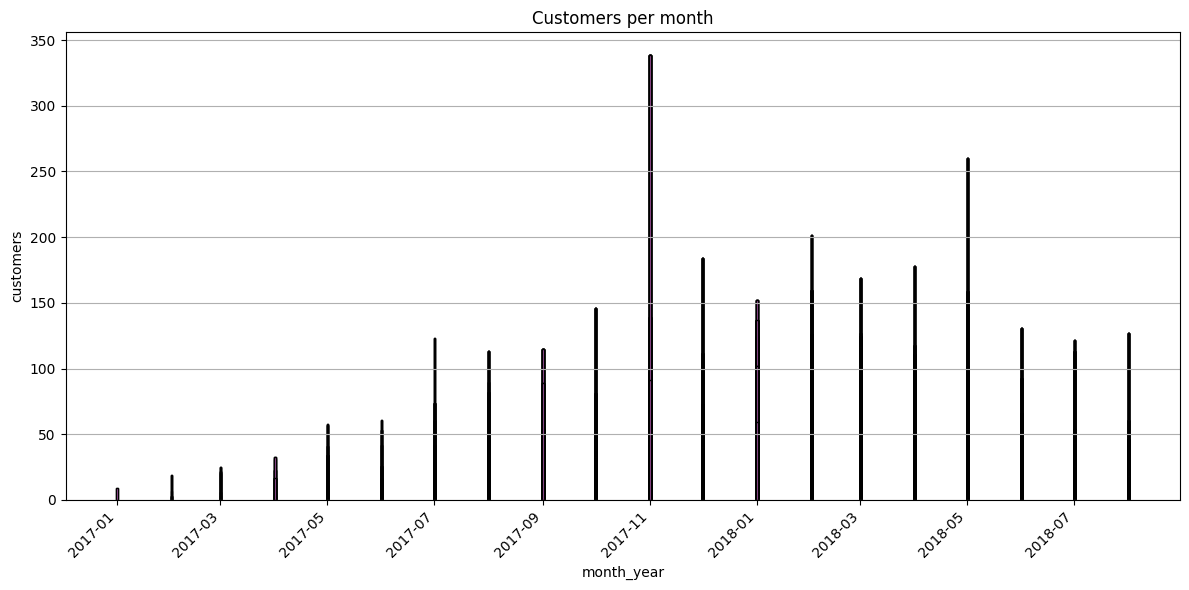

In [23]:
import matplotlib.pyplot as plt

# データ準備（欠損値処理は必要に応じて）
data = monthly_df.dropna(subset=['month_year', 'customers'])

# プロット
plt.figure(figsize=(12, 6))
plt.bar(data['month_year'], data['customers'], color='orchid', edgecolor='black')
plt.title('Customers per month')
plt.xlabel('month_year')
plt.ylabel('customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')

plt.show()


# 月ごとの分析



In [24]:
cols_to_mean = ['product_id', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]

products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

### データを結合する

In [25]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()

In [26]:
df_category = df[["product_id","product_category_name"]]
category_dict = dict(zip(df_category["product_id"], df_category["product_category_name"]))


In [27]:
monthly_product = pd.merge(monthly_df,products,on= "product_id",how = "inner")
monthly_product = pd.merge(monthly_product,df_category,on = "product_id",how = "inner")

## 日時をカラムに追加する
諸注意：datetime型では機械学習で学習をすることができないので変換する必要がある

In [28]:
import numpy as np
import pandas as pd

def add_cyclic_date_features(df, date_col, drop_original=False):
    """
    日付列から周期性を考慮した特徴量（sin/cos）を追加する関数。
    
    Parameters:
        df : pandas.DataFrame
            処理対象のデータフレーム
        date_col : str
            日付が格納されている列の名前（datetime型である必要あり）
        drop_original : bool
            month, day, weekday などの元列を削除するかどうか
        
    Returns:
        df : pandas.DataFrame
            特徴量が追加されたデータフレーム
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])  # 念のため型変換

    # 時間情報の抽出
    df["year"] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['weekday'] = df[date_col].dt.weekday  # 月:0〜日:6
    df.drop(date_col,axis = 1,inplace= True)

    # 周期性を考慮した変換
    # df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    # df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    # df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

    # df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    # df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

    # if drop_original:
        # df.drop([date_col], axis=1, inplace=True)

    return df


In [29]:
cycle_month_products = add_cyclic_date_features(monthly_product,date_col = "month_year",drop_original=True)
cycle_month_products = cycle_month_products.drop("total_price_x",axis=1)

## ターゲットの年とprduct_id、その種類を定義

In [30]:
target_year = 2017
target_product = "health5"
target_category = category_dict[target_product]
model_dataset = cycle_month_products[(cycle_month_products["year"] == target_year) &(cycle_month_products["product_category_name"] == target_category) ] 
target_qty = cycle_month_products[(cycle_month_products["year"] == target_year) & (cycle_month_products["product_id"] == target_product)]
# target_qty.drop(["product_category_name"],inplace= True,axis=1)

# 特徴量に関してはunit_priceと相関が高いものは削除する
今回はかなり限定的な特徴量を用いる

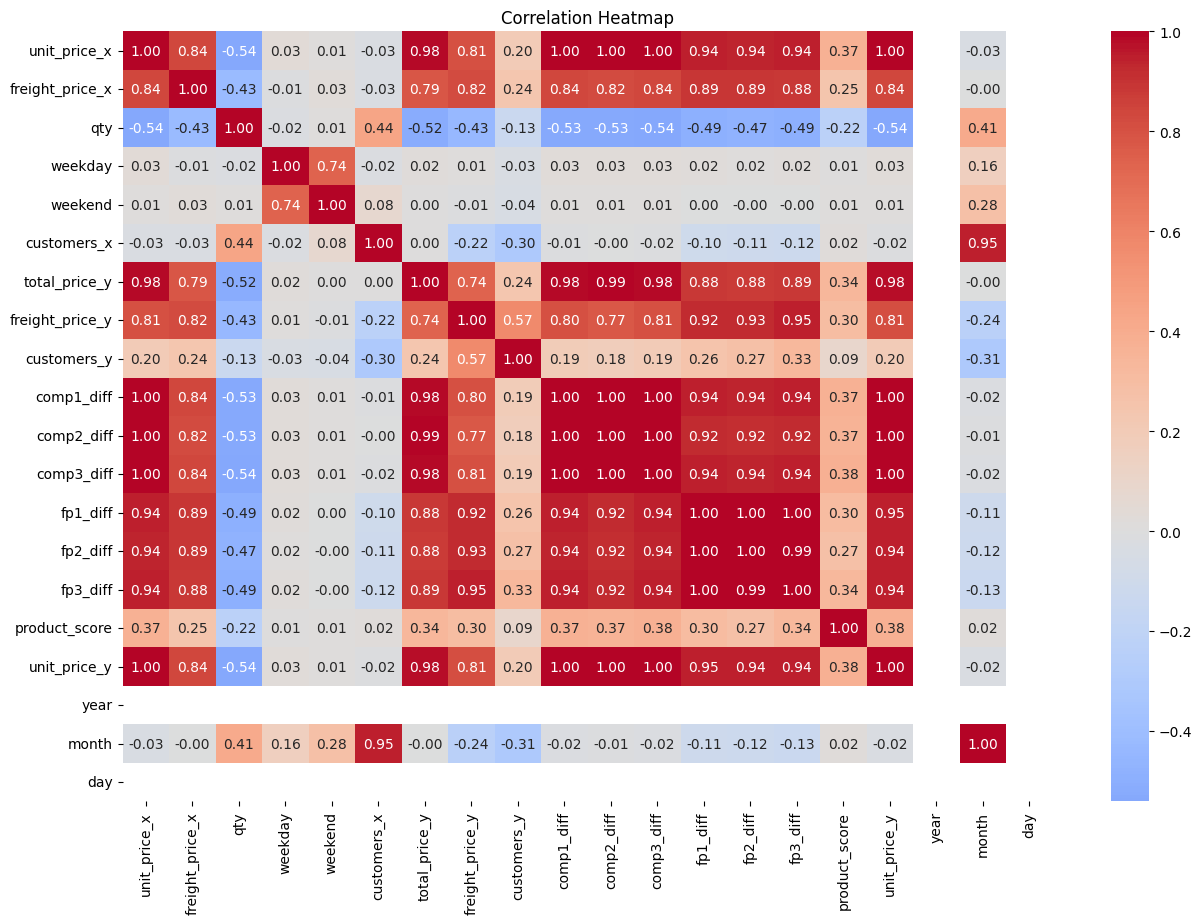

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 数値データの相関係数を計算
corr_matrix = model_dataset.corr(numeric_only=True)

# ヒートマップの描画
plt.figure(figsize=(15, 10))  # サイズ調整（任意）
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
not_fe = ["product_id","qty","product_category_name","year","month","day",'comp1_diff', 'comp2_diff', 'comp3_diff', 'fp1_diff','fp2_diff', 'fp3_diff',"product_score","freight_price_x","total_price_y","freight_price_y","unit_price_y","customers_x"]#学習に用いわない特徴量
target = "qty"

X = model_dataset.drop(not_fe,axis=1)
y = model_dataset["qty"]


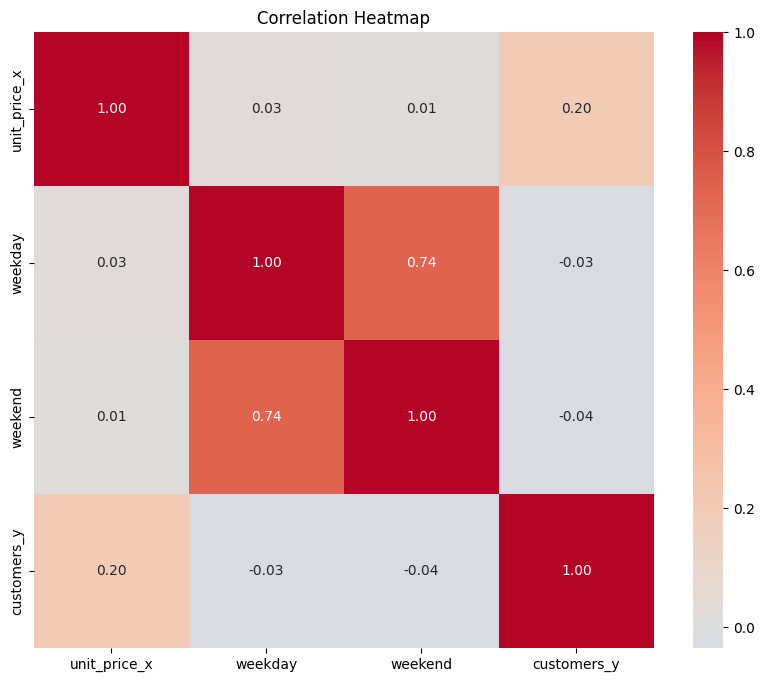

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 数値データの相関係数を計算
corr_matrix = X.corr(numeric_only=True)

# ヒートマップの描画
plt.figure(figsize=(10, 8))  # サイズ調整（任意）
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# Model Building

今回予想に用いるモデルは回帰モデルの重回帰分析で行う。

## モデルの学習

R2 score: 0.294
Mean Absolute Error: 6.263


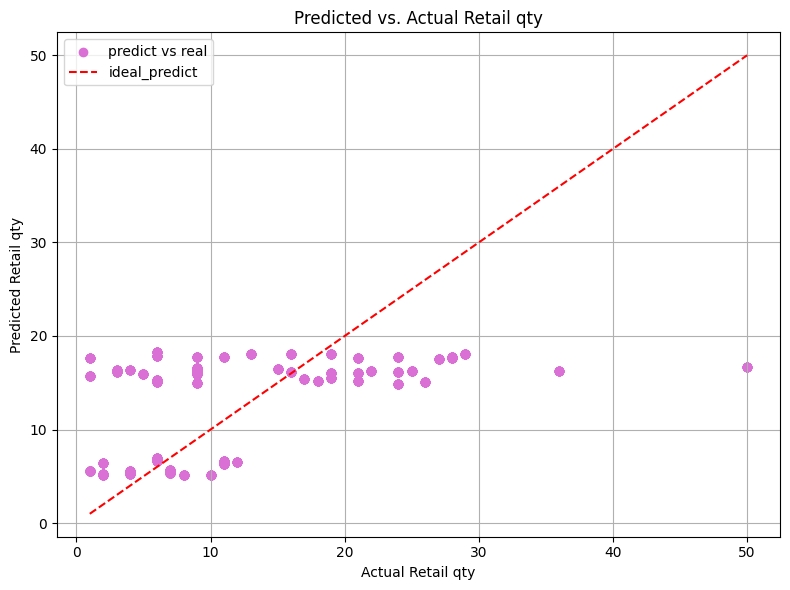

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import plotly.graph_objs as go

# パイプラインの作成（正規化 + 線形回帰）
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# モデルの学習
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

# 評価指標の出力
print(f"R2 score: {r2_score(y, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred):.3f}")

# 可視化
import matplotlib.pyplot as plt
import numpy as np

# 実測値と予測値
actual = y
predicted = y_pred

plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, color='orchid', label='predict vs real')

# 理想線 y = x
min_val = min(actual.min(), predicted.min())
max_val = max(actual.max(), predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='ideal_predict')

plt.title('Predicted vs. Actual Retail qty')
plt.xlabel('Actual Retail qty')
plt.ylabel('Predicted Retail qty')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 定式化

### 入力
月:m\
商品:p\
モデル:f\
S:在庫量\
F:商品pの価格を含めた特徴量
変更前価格:$x_{berore}$

### 変数
変更後価格:x
売上量:q



### 定式化(自然言語ver)


\begin{align}
maximize.  \ 
& \sum(各月の売上\times 各月の価格) \\
subject\ to. \\
& 各商品の売上モデル(価格を含む商品の特徴量) = 売上量\\
& 在庫量 = \sum売上量 \\
& 変更後価格 \in 価格を含む商品の特徴量
\end{align}
### 定式化


\begin{align}
maximize.  \ 
& \sum_{m=1}^{12} q_m * x_m \\
subject\ to. \\
& f(F_m) = q_m \ (m = 1,2,\cdots 12) \\
& S = \sum_{m=1}^{12}q_i \\
& x_m \in F_m
\end{align}

#### このままではソルバーに投げても価格が非現実的な解を出力したため制約式(6),(7)を追加した下記のような定式化にする

### 定式化(solver.ver)


\begin{align}
maximize.  \ 
& \sum_{m=1}^{12} q_m * x_m \\
subject\ to. \\
& f(F_m) = q_m \ (m = 1,2,\cdots 12) \\
& S = \sum_{m=1}^{12}q_i \\
& x_m \in F_m \\
& 0.8x_{before} \leq x  \\
& 1.2x_{before} \geq x
\end{align}


## 年ごとの在庫量を構築。qtyの年ごとの和を取得している

In [35]:
stock = pd.DataFrame(cycle_month_products.groupby(["product_id","year"]).sum()["qty"]).reset_index()
target_stock = stock[(stock["product_id"] == target_product) & (stock["year"] == target_year)]["qty"]

## gurobiを使って定式化

In [36]:
import gurobipy as gp
from gurobi_ml import add_predictor_constr
import gurobipy_pandas as gppd

In [37]:


#定式化
m = gp.Model()

#変数を定義
# discount = gppd.add_vars(m,target_qty,name = "discount",lb = 0.0,ub = 0.5)#cycle_moth_productsの各行に対してdiscountという変数を設定
# new_qty や new_price に現実的な範囲の上下限を指定する
price_lb = target_qty["unit_price_x"] * 0.8
price_ub = target_qty["unit_price_x"] * 1.2
new_qty = gppd.add_vars(m, target_qty, name="new_qty", lb=0.0, ub=1000.0)
new_price = gppd.add_vars(m, target_qty, name="new_price")


# #利益最大化の目的関数
revenue_expr = gp.quicksum(
    new_qty[i] * (new_price[i]) 
    for i in target_qty.index
)
m.setObjective(revenue_expr,gp.GRB.MAXIMIZE)

#制約式を定義
m.addConstrs(new_price[i] >= price_lb[i] for i in target_qty.index)
m.addConstrs(new_price[i] <= price_ub[i] for i in target_qty.index)
m.addConstr(new_qty.sum() <= target_stock)#予測される売り上げ量が年間売り上げ量以下
m.update()
feats = target_qty.drop(not_fe,axis=1)
feats["unit_price_x"] = new_price



pred_constr = add_predictor_constr(m,pipeline,feats,new_qty)
# m.Params.NonConvex = 2

m.Params.TimeLimit = 600
m.write("model.lp")

m.optimize()



Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-07
Set parameter TimeLimit to value 600
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 23.6.0 23H124)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  600

Optimize a model with 1681 rows, 2160 columns and 3840 nonzeros
Model fingerprint: 0xde7b34dd
Model has 240 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-01, 2e+02]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 2e+03]
  RHS range        [3e+00, 2e+03]
Presolve removed 1440 rows and 1680 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 1440 rows and 1680 columns
Presolve time: 0.00s
Presolved: 722 rows, 722 columns, 2401 nonzeros
Presolved model has 240 bilinear constraint(s)
Variable types: 722 continuous, 0 integer (0 binary)
Found heuri

### 結果の可視化

In [38]:
import pandas as pd

# 最適化後の解の取得
results = []

for i in target_qty.index:
    pid = target_qty.at[i, "product_id"]
    original_qty = target_qty.at[i, "qty"]
    original_price = target_qty.at[i,"unit_price_x"]
    
    price = new_price[i].X
    qty = new_qty[i].X

    
    revenue = price * qty
    original_revenue = original_price * original_qty

    results.append({
        "product_id": pid,
        "original_qty": original_qty,
        "optimized_qty": qty,
        "original_price":original_price,
        "optimized_price": price,
        "original_revenue":original_revenue,
        "optimal_revenue": revenue
    })

# DataFrame化して表示
results_df = pd.DataFrame(results)

# 結果表示（必要に応じてソートやフィルター）
print(results_df)  # 上位10件のみ表示（多い場合）
print("\n🔢 合計売上（最適化後）:", results_df["optimal_revenue"].sum())


    product_id  original_qty  optimized_qty  original_price  optimized_price  \
0      health5             8       5.212274           349.9       347.852812   
1      health5             8       5.212274           349.9       347.852812   
2      health5             8       5.212274           349.9       347.852812   
3      health5             8       5.212274           349.9       347.852812   
4      health5             8       5.212274           349.9       347.852812   
..         ...           ...            ...             ...              ...   
235    health5             7       5.508350           349.9       355.783089   
236    health5             7       5.508350           349.9       355.783089   
237    health5             7       5.508350           349.9       355.783089   
238    health5             7       5.508350           349.9       355.783089   
239    health5             7       5.508350           349.9       355.783089   

     original_revenue  optimal_revenue 

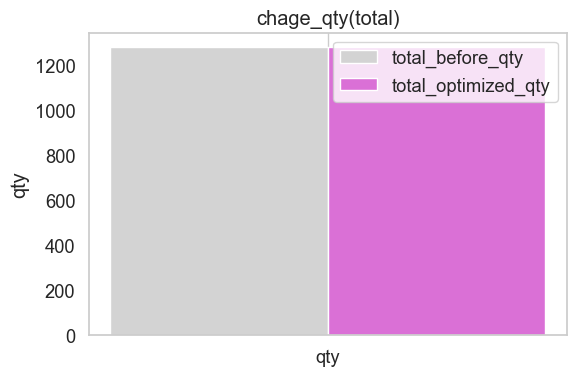

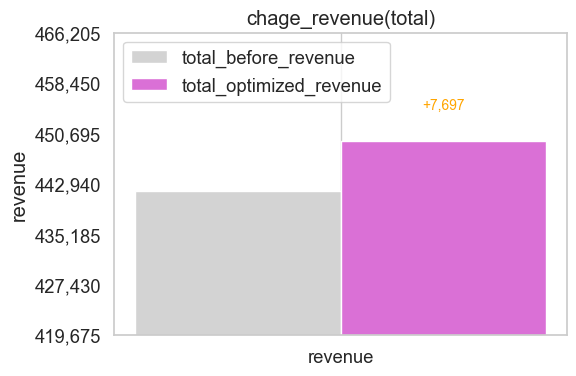

In [45]:
import matplotlib.pyplot as plt
import numpy as np

total_original_qty = results_df["original_qty"].sum()
total_optimized_qty = results_df["optimized_qty"].sum()
total_original_revenue = results_df["original_revenue"].sum()
total_optimized_revenue = results_df["optimal_revenue"].sum()

qty_diff = total_optimized_qty - total_original_qty
rev_diff = total_optimized_revenue - total_original_revenue

width = 0.35
x = np.arange(1)

# 数量変化
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - width/2, [total_original_qty], width, label='total_before_qty', color='lightgray')
ax.bar(x + width/2, [total_optimized_qty], width, label='total_optimized_qty', color='orchid')
ax.set_xticks(x)
ax.set_xticklabels(['qty'])
ax.set_ylabel('qty')
ax.set_title('chage_qty(total)')
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()

# 売上変化
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x - width/2, [total_original_revenue], width, label='total_before_revenue', color='lightgray')
ax.bar(x + width/2, [total_optimized_revenue], width, label='total_optimized_revenue', color='orchid')
ax.set_xticks(x)
ax.set_xticklabels(['revenue'])
ax.set_ylabel('revenue')
ax.set_title('chage_revenue(total)')
ax.legend()
ax.grid(axis='y')

# y軸目盛りを総売上の最小値と最大値に応じて設定

# y軸の最小値を元データの95%くらいに設定して、0スタートじゃなくする
min_data = min(total_original_revenue, total_optimized_revenue)
max_data = max(total_original_revenue, total_optimized_revenue)

min_y = min_data * 0.95
max_y = max_data * 1.02  # 上は20%余裕

step = (max_y - min_y) / 5  # 5分割

yticks = np.arange(min_y, max_y + step, step)
ax.set_ylim(min_y, max_y)  # y軸範囲設定
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(y):,}' for y in yticks])

color = 'red' if rev_diff < 0 else 'orange'
sign = '' if rev_diff < 0 else '+'
for xpos, val in zip([x[0] + width/2], [total_optimized_revenue]):
    ax.text(xpos, val * 1.01, f'{sign}{rev_diff:,.0f}', ha='center', va='bottom', fontsize=10, color=color)

plt.tight_layout()
plt.show()



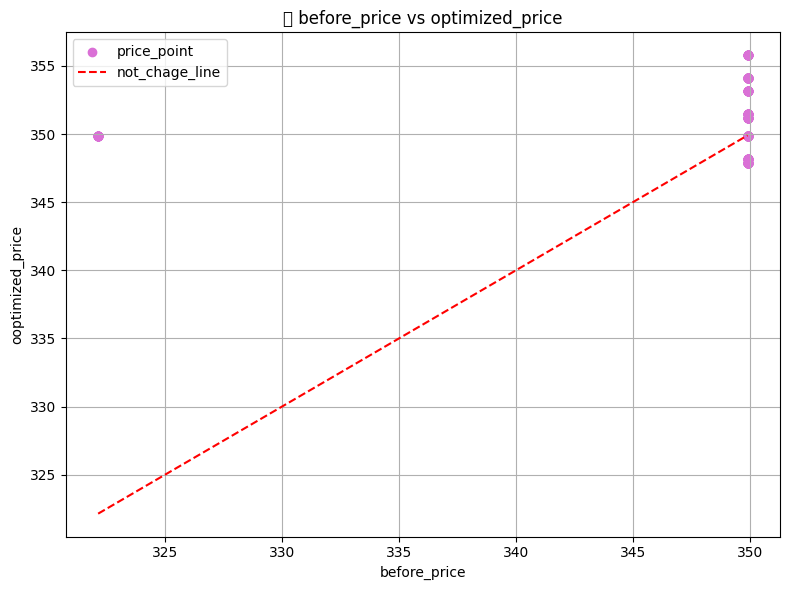

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x = results_df["original_price"]
y = results_df["optimized_price"]
product_ids = results_df["product_id"]

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='orchid', label='price_point')

# 理想線（y=xの線）を引く
min_val = x.min()
max_val = x.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='not_chage_line')

plt.title('💸 before_price vs optimized_price')
plt.xlabel('before_price')
plt.ylabel('ooptimized_price')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


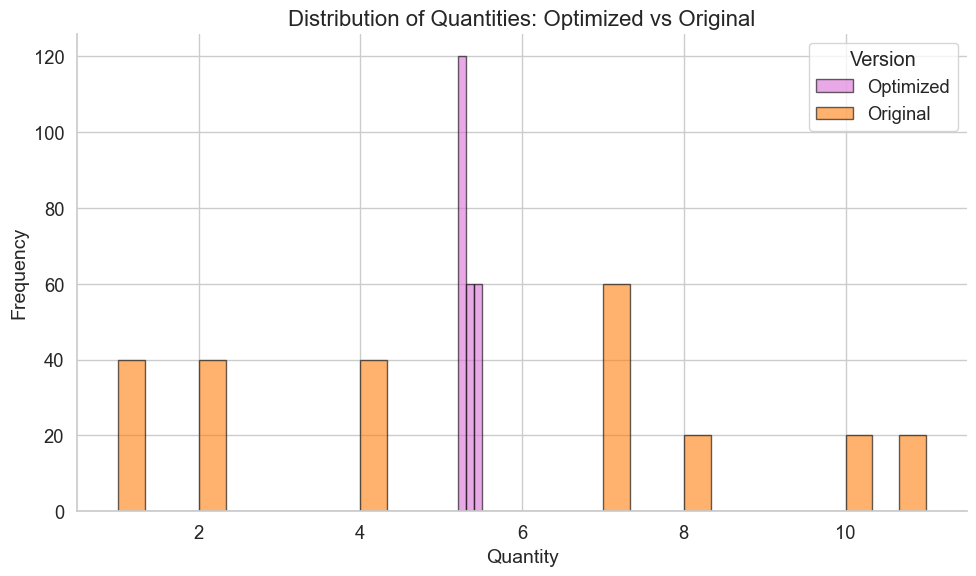

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# スタイル設定
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# FigureとAxesの作成
fig, ax = plt.subplots(figsize=(10, 6))

# ヒストグラムの描画
ax.hist(results_df["optimized_qty"], bins=3, alpha=0.6, label="Optimized", color='orchid', edgecolor="black")
ax.hist(results_df["original_qty"], bins=30, alpha=0.6, label="Original", color="#ff7f0e", edgecolor="black")

# タイトルとラベル
ax.set_title("Distribution of Quantities: Optimized vs Original", fontsize=16)
ax.set_xlabel("Quantity", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# 凡例
ax.legend(title="Version")

# 枠線の非表示
sns.despine()

# 表示
plt.tight_layout()
plt.show()


## 結果と今後の課題
本研究では、重回帰分析を用いた売上の最適化を試みた。その結果、すべての制約条件を満たしつつ、最適化前と比較して売上を向上させることができた。また、価格に対して制約を設けることで、現実的な水準の価格設定が可能となった点も成果のひとつである。

一方で、本モデルでは価格と売上量を連続値として扱っており、この点が一部現実的でない解を導く要因となっていた。売上量に整数制約を加えることで、より実践的で信頼性の高いモデルになると考えられる。

さらに、既存の動的価格最適化に関する研究では、価格変動に対する消費者の心理やタイミングといった要因が売上に大きく影響することが知られているが、これらの要素は現状の機械学習モデルでは十分に捉えきれていない。今後は、こうした人間的要因も含めたモデル構築が求められるだろう。

今後も、動的価格最適化をはじめとする機械学習と数理最適化の融合に関する研究がますます活発になると予想される。本ノートブックの知見をもとに、引き続き本分野の動向を注視し、応用の可能性を探っていきたい。